## COVID-19 Vaccination Rate VS Death Cases

### Imports

In [27]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
pio.renderers.default = "jupyterlab"   # or "notebook_connected"


## Loading the Data

**Covid-19 vaccine doses administered per 100 people Data**

In [28]:
# Load the vaccination data
vacc_df = pd.read_csv("covid-19-vaccine-doses-administered-per-100-people.csv")
vacc_df["Day"] = pd.to_datetime(vacc_df["Day"])

#rename column for easier usablility 
vacc_df.rename(columns={
    "COVID-19 doses (cumulative, per hundred)": "doses_per_100"
}, inplace=True)


**Daily new confirmed covid-19 deaths per million people**

In [29]:
# Load the deaths data
deaths_df = pd.read_csv("daily-new-confirmed-covid-19-deaths-per-million-people.csv")
deaths_df["Day"] = pd.to_datetime(deaths_df["Day"])

#rename column for easier usablility 
deaths_df.rename(columns={
    "Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)": "deaths_per_million"
}, inplace=True)

## Merging the Datasets 


In [30]:
# Merge on Entity and Day
# merged = pd.merge(deaths_df, vacc_df, on=["Entity", "Day"], how="inner")


In [31]:
# Merge with outer join
merged = pd.merge(
    deaths_df, 
    vacc_df, 
    on=["Entity", "Day"], 
    how="outer"
)

# Convert Day to datetime
merged["Day"] = pd.to_datetime(merged["Day"])

# Keep only data up to Dec 31, 2023
merged = merged[merged["Day"] <= "2023-12-31"]

# Sort by country and date
merged = merged.sort_values(by=["Entity", "Day"]).reset_index(drop=True)

# Forward-fill vaccination values within each country
merged["doses_per_100"] = merged.groupby("Entity")["doses_per_100"].ffill()

# Replace pre-vaccine NaN with 0
merged["doses_per_100"] = merged["doses_per_100"].fillna(0)

# Option: deaths stay as reported (NaN = missing report)
# If you prefer smoother graphs, uncomment one of these:
merged["deaths_per_million"] = merged.groupby("Entity")["deaths_per_million"].ffill()
# merged["deaths_per_million"] = merged["deaths_per_million"].fillna(0)


In [32]:
merged.tail(80)


Entity        Day  deaths_per_million  doses_per_100
7185  United States 2023-10-13            0.550876       198.1439
7186  United States 2023-10-14            0.550876       198.1439
7187  United States 2023-10-15            0.550876       198.1439
7188  United States 2023-10-16            0.550876       198.1439
7189  United States 2023-10-17            0.583084       198.1439
...             ...        ...                 ...            ...
7260  United States 2023-12-27            0.934439       198.1439
7261  United States 2023-12-28            0.934439       198.1439
7262  United States 2023-12-29            0.934439       198.1439
7263  United States 2023-12-30            0.934439       198.1439
7264  United States 2023-12-31            0.934439       198.1439

[80 rows x 4 columns]

## Dividing the Dataset by countries

In [33]:
countries = ["Portugal", "United States", "Australia", "South Africa", "Chile"]

# Dictionary where key = country name, value = filtered dataframe
country_dfs = {country: merged[merged["Entity"] == country].copy() for country in countries}

df_portugal = country_dfs["Portugal"]
df_usa = country_dfs["United States"]
df_chile = country_dfs["Chile"]
df_australia = country_dfs["Australia"]
df_southafrica = country_dfs["South Africa"]

## Countries Dataset Display

### Portugal

In [34]:
df_portugal

Entity        Day  deaths_per_million  doses_per_100
2906  Portugal 2020-01-09            0.000000        0.00000
2907  Portugal 2020-01-10            0.000000        0.00000
2908  Portugal 2020-01-11            0.000000        0.00000
2909  Portugal 2020-01-12            0.000000        0.00000
2910  Portugal 2020-01-13            0.000000        0.00000
...        ...        ...                 ...            ...
4354  Portugal 2023-12-27            0.589694      271.81256
4355  Portugal 2023-12-28            0.589694      271.81256
4356  Portugal 2023-12-29            0.589694      271.81256
4357  Portugal 2023-12-30            0.589694      271.81256
4358  Portugal 2023-12-31            0.589694      271.81256

[1453 rows x 4 columns]

### United States

In [35]:
df_usa

Entity        Day  deaths_per_million  doses_per_100
5812  United States 2020-01-09            0.000000         0.0000
5813  United States 2020-01-10            0.000000         0.0000
5814  United States 2020-01-11            0.000000         0.0000
5815  United States 2020-01-12            0.000000         0.0000
5816  United States 2020-01-13            0.000000         0.0000
...             ...        ...                 ...            ...
7260  United States 2023-12-27            0.934439       198.1439
7261  United States 2023-12-28            0.934439       198.1439
7262  United States 2023-12-29            0.934439       198.1439
7263  United States 2023-12-30            0.934439       198.1439
7264  United States 2023-12-31            0.934439       198.1439

[1453 rows x 4 columns]

### Chile

In [36]:
df_chile

Entity        Day  deaths_per_million  doses_per_100
1453  Chile 2020-01-09            0.000000        0.00000
1454  Chile 2020-01-10            0.000000        0.00000
1455  Chile 2020-01-11            0.000000        0.00000
1456  Chile 2020-01-12            0.000000        0.00000
1457  Chile 2020-01-13            0.000000        0.00000
...     ...        ...                 ...            ...
2901  Chile 2023-12-27            0.175348      341.94290
2902  Chile 2023-12-28            0.175348      341.94290
2903  Chile 2023-12-29            0.175348      341.96774
2904  Chile 2023-12-30            0.175348      341.96774
2905  Chile 2023-12-31            0.175348      341.96774

[1453 rows x 4 columns]

### Australia

In [37]:
df_australia

Entity        Day  deaths_per_million  doses_per_100
0     Australia 2020-01-09            0.000000        0.00000
1     Australia 2020-01-10            0.000000        0.00000
2     Australia 2020-01-11            0.000000        0.00000
3     Australia 2020-01-12            0.000000        0.00000
4     Australia 2020-01-13            0.000000        0.00000
...         ...        ...                 ...            ...
1448  Australia 2023-12-27            0.387118      264.51865
1449  Australia 2023-12-28            0.387118      264.51865
1450  Australia 2023-12-29            0.387118      264.51865
1451  Australia 2023-12-30            0.387118      264.51865
1452  Australia 2023-12-31            0.387118      265.97055

[1453 rows x 4 columns]

### South Africa

In [38]:
df_southafrica

Entity        Day  deaths_per_million  doses_per_100
4359  South Africa 2020-01-09                 0.0         0.0000
4360  South Africa 2020-01-10                 0.0         0.0000
4361  South Africa 2020-01-11                 0.0         0.0000
4362  South Africa 2020-01-12                 0.0         0.0000
4363  South Africa 2020-01-13                 0.0         0.0000
...            ...        ...                 ...            ...
5807  South Africa 2023-12-27                 0.0        67.0085
5808  South Africa 2023-12-28                 0.0        67.0085
5809  South Africa 2023-12-29                 0.0        67.0085
5810  South Africa 2023-12-30                 0.0        67.0085
5811  South Africa 2023-12-31                 0.0        67.0085

[1453 rows x 4 columns]

# Vizualisation

## Portugal

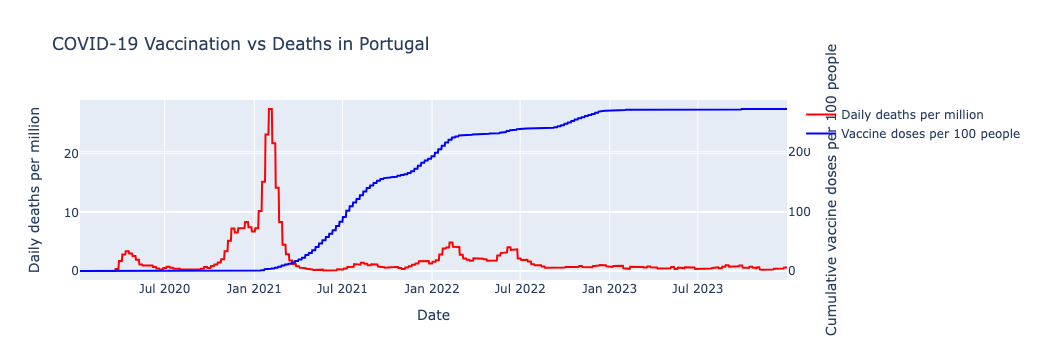

In [39]:
country = "Portugal"
df_country = country_dfs[country]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["deaths_per_million"], mode="lines", name="Daily deaths per million", yaxis="y1", line=dict(color="red")))
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["doses_per_100"], mode="lines", name="Vaccine doses per 100 people", yaxis="y2", line=dict(color="blue")))
fig.update_layout(title=f"COVID-19 Vaccination vs Deaths in {country}", xaxis=dict(title="Date"), yaxis=dict(title="Daily deaths per million", side="left"), yaxis2=dict(title="Cumulative vaccine doses per 100 people", overlaying="y", side="right"))
fig.show()

### Insight:

- Early 2021: A major death spike occurred just before vaccination rollout.

- After mass vaccination (200+ doses/100 people), deaths dropped dramatically.

- Later waves (2022–2023) were much smaller, showing clear vaccine impact.

## United States

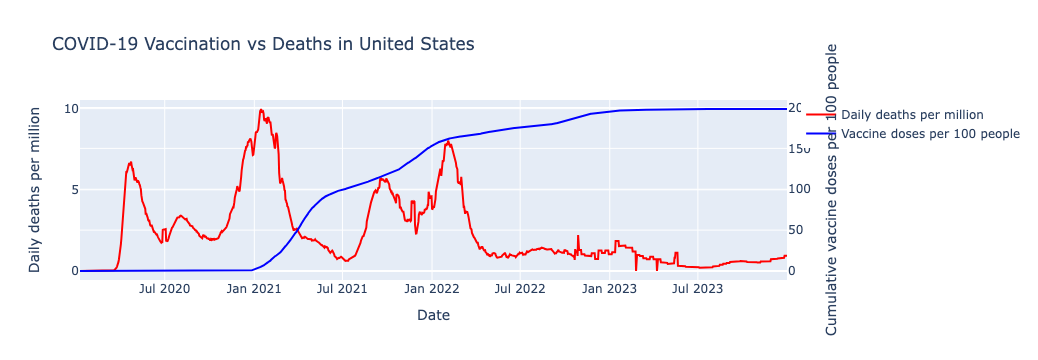

In [40]:
country = "United States"
df_country = country_dfs[country]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["deaths_per_million"], mode="lines", name="Daily deaths per million", yaxis="y1", line=dict(color="red")))
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["doses_per_100"], mode="lines", name="Vaccine doses per 100 people", yaxis="y2", line=dict(color="blue")))
fig.update_layout(title=f"COVID-19 Vaccination vs Deaths in {country}", xaxis=dict(title="Date"), yaxis=dict(title="Daily deaths per million", side="left"), yaxis2=dict(title="Cumulative vaccine doses per 100 people", overlaying="y", side="right"))
fig.show()

### Insight:

- Deaths spiked multiple times even after vaccines became available (late 2020–2022).

- Vaccination doses plateaued around 200/100 people, but deaths still rose in late 2021 and early 2022 (likely Delta/Omicron).

- Later (2023 onwards), deaths stabilized at much lower levels.

## Chile

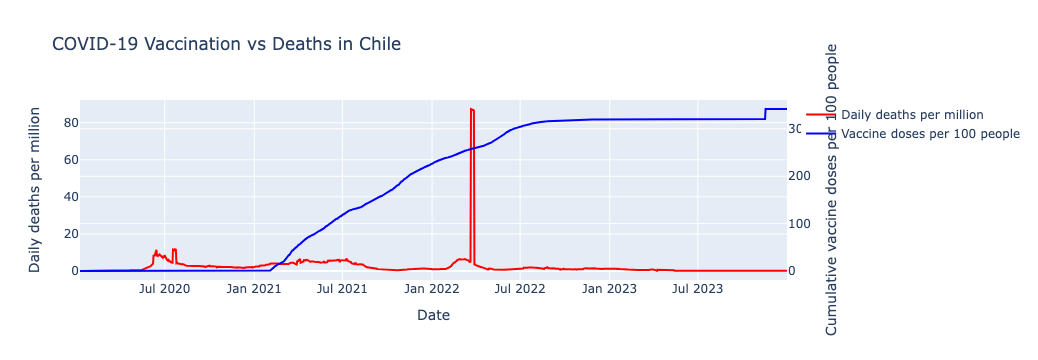

In [41]:
country = "Chile"
df_country = country_dfs[country]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["deaths_per_million"], mode="lines", name="Daily deaths per million", yaxis="y1", line=dict(color="red")))
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["doses_per_100"], mode="lines", name="Vaccine doses per 100 people", yaxis="y2", line=dict(color="blue")))
fig.update_layout(title=f"COVID-19 Vaccination vs Deaths in {country}", xaxis=dict(title="Date"), yaxis=dict(title="Daily deaths per million", side="left"), yaxis2=dict(title="Cumulative vaccine doses per 100 people", overlaying="y", side="right"))
fig.show()


### Insight: 

- Chile had one of the fastest rollouts: doses exceeded 300 per 100 people quickly.

- A large death spike in early 2022 despite high vaccination—likely due to Omicron’s high transmissibility.

- However, after this, deaths dropped to almost zero, showing long-term effectiveness.

## Australia

In [244]:
country = "Australia"
df_country = country_dfs[country]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["deaths_per_million"], mode="lines", name="Daily deaths per million", yaxis="y1", line=dict(color="red")))
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["doses_per_100"], mode="lines", name="Vaccine doses per 100 people", yaxis="y2", line=dict(color="blue")))
fig.update_layout(title=f"COVID-19 Vaccination vs Deaths in {country}", xaxis=dict(title="Date"), yaxis=dict(title="Daily deaths per million", side="left"), yaxis2=dict(title="Cumulative vaccine doses per 100 people", overlaying="y", side="right"))
fig.show()

### Insight 

- Very low deaths in 2020–2021, mainly due to strict border controls.

- Vaccination rollout was later (mid-2021), quickly rising to ~250/100 people.

- Deaths spiked after reopening in 2022, despite high vaccination.

- Still, the death rate remained much lower than in the US or Chile.

## South Africa

In [245]:
country = "South Africa"
df_country = country_dfs[country]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["deaths_per_million"], mode="lines", name="Daily deaths per million", yaxis="y1", line=dict(color="red")))
fig.add_trace(go.Scatter(x=df_country["Day"], y=df_country["doses_per_100"], mode="lines", name="Vaccine doses per 100 people", yaxis="y2", line=dict(color="blue")))
fig.update_layout(title=f"COVID-19 Vaccination vs Deaths in {country}", xaxis=dict(title="Date"), yaxis=dict(title="Daily deaths per million", side="left"), yaxis2=dict(title="Cumulative vaccine doses per 100 people", overlaying="y", side="right"))
fig.show()

### Insight:

- Multiple large death waves before vaccination (2020–2021).

- Vaccination rollout was slower and lower, plateauing around ~70 doses/100 people.

- Deaths decreased but not as dramatically as in Portugal or Chile.

## Overall Trends

1. Vaccination rollout timing

    - In all countries, deaths were already high before vaccination campaigns began (late 2020 to early 2021).

    - Vaccination coverage increased steadily after rollout, with some countries exceeding 200–300 doses per 100 people due to boosters.

2. Deaths after high vaccination coverage

    - Across all graphs, once vaccination rates passed ~100 doses per 100 people, major death waves became less frequent and less severe, though spikes still occurred (often due to variants like Delta and Omicron).

    - This supports the idea that vaccines were more effective in reducing severity (deaths) rather than completely stopping transmission.

3. Booster influence

    - In countries with very high cumulative doses (Chile, Portugal), the vaccination line continues climbing even after 2022, while deaths stay very low. This suggests boosters were adopted widely and helped maintain protection.